In [7]:
%pwd

'C:\\Users\\leeyubin'

In [2]:
import csv
text = []
with open("나혼자산다 댓글모음.csv") as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        text.append(row[2])

In [3]:
print('Num of samples: {}'.format(len(text)))

Num of samples: 6250


In [4]:
from konlpy.tag import Hannanum
hannanum = Hannanum() 
 
hannanum.analyze  #구(Phrase) 분석
hannanum.morphs   #형태소 분석
hannanum.nouns    #명사 분석
hannanum.pos      #형태소 분석 태깅

<bound method Hannanum.pos of <konlpy.tag._hannanum.Hannanum object at 0x000002E1180B0640>>

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [8]:
te = []
for i in range(1559):
    number = "u" + text[i]
    te.append(okt.nouns(number))

In [9]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [10]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [11]:
ten = TransactionEncoder()
te_ary = ten.fit(te).transform(te)
df = pd.DataFrame(te_ary, columns=ten.columns_) 

In [12]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.016677,(개)
1,0.038486,(거)
2,0.017319,(것)
3,0.011546,(계속)
4,0.012187,(공감)
...,...,...
74,0.012187,"(지금, 이국주)"
75,0.010904,"(진짜, 이국주)"
76,0.013470,"(혼자, 지금)"
77,0.012187,"(혼자, 진짜)"


In [26]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(거),(진짜),0.038486,0.140475,0.011546,0.300000,2.135616,0.006140,1.227893
1,(언니),(국),0.026299,0.033996,0.018602,0.707317,20.805798,0.017708,3.300513
2,(국),(언니),0.033996,0.026299,0.018602,0.547170,20.805798,0.017708,2.150257
3,(산다),(나),0.021809,0.056446,0.014753,0.676471,11.984291,0.013522,2.916438
4,(나),(혼자),0.056446,0.041693,0.025657,0.454545,10.902098,0.023304,1.756895
5,(혼자),(나),0.041693,0.056446,0.025657,0.615385,10.902098,0.023304,2.453239
6,(나혼산),(때),0.028865,0.098140,0.010263,0.355556,3.622948,0.007430,1.399438
7,(나혼산),(지금),0.028865,0.065427,0.012187,0.422222,6.453377,0.010299,1.617531
8,(나혼자산다),(때),0.035279,0.098140,0.011546,0.327273,3.334759,0.008084,1.340603
9,(나혼자산다),(지금),0.035279,0.065427,0.010904,0.309091,4.724242,0.008596,1.352672


In [13]:
import networkx as nx

In [14]:
df = pd.DataFrame(frequent_itemsets)
df['length'] = df['itemsets'].apply(lambda x:len(x))
df = df[(df['length']==2)&(df['support']>=0.01)].sort_values(by='support',ascending=False)

In [15]:
G = nx.Graph()
ar = df['itemsets']
G.add_edges_from(ar) 

In [16]:
import numpy as np
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / max(nsize) - min(nsize)

In [17]:
pos = nx.shell_layout(G)

C:\Users\leeyubin\anaconda3\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


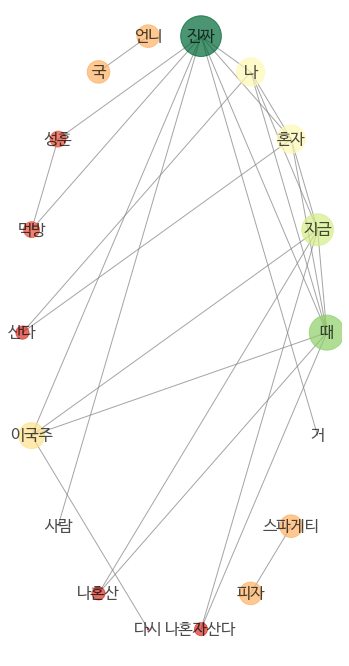

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,12))
plt.axis('off')
nx.draw_networkx(G,font_family = 'NanumBarunGothic', font_size=16,
                pos=pos, node_color = list(pr.values()), node_size=nsize,
                alpha=0.7, edge_color=".5", cmap=plt.cm.RdYlGn)

In [43]:
from konlpy.tag import Okt
okt = Okt()

okt.morphs     #형태소 분석
okt.nouns      #명사 분석
okt.phrases    #구(Phrase) 분석
okt.pos        #형태소 분석 태깅

<bound method Okt.pos of <konlpy.tag._okt.Okt object at 0x0000025EA986FFD0>>